In [11]:
from dicke_h import *
from qutip import *
from matplotlib import pyplot as plt
#from scipy.linalg import expm

In [12]:
#rho0 = dicke.ghz()
#rho0 = dicke.dicke(N/2,N/2)
#t = np.linspace(0, 10, 100)
#result = dicke.solve(rho0, t)
#rho_t = result.states

In [13]:
N = 10
gE = 0 # loss
gP = 1 # pumping
gD = 0.1 # dephasing
gCE = 1 # emission
gCP = 1 # collective pumping
gCD = 0.1 # collective dephasing
dicke = Dicke(N = N, loss = gE, emission = gCE, pumping = gP, dephasing = gD, collective_pumping = gCP, collective_dephasing = gCD)
psolv = Pisolve(dicke)
jmm_dict = dicke.jmm1_dictionary();
#print(jmm_dict)
nds = num_dicke_states(N)
jmm_flat = dicke.jmm1_flat();
jmm_keys = [int(k) for k in jmm_flat.keys()]

In [14]:
#Lindblad superoperator
ll = psolv.lindblad_sup()

In [15]:
#linear size of the Lindblad superoperator square matrix
nds**2

1296

In [44]:
td = np.log(N)/gCE
aa = 5
tmax = aa * td
time_steps = 1000
t = np.linspace(0, tmax, time_steps)
h = dicke.hamiltonian
lind = psolv.lindblad_sup()
liouv = psolv.liouvillian()
ih_sup = -1j*spre(h) + 1j*spost(h)
liouv2 = ih_sup + lind
rho0 = dicke.dicke(N/2,N/2)
print(isdiagonal(liouv))
print(liouv == liouv2)

False
True


In [32]:
#rho1 = steadystate(L)
#print(expect(rho1,a.dag()*a))
#steadystate(L)
jz = jz_op(N)
jp = jp_op(N)
jm = jm_op(N)
print(to_super(jz).dims == liouv.dims)
#for i in range(0,liouv.shape[0]):
#    print("liouv ", i, liouv[i])
#    print("lindb ", i, lind[i])
#    print("ihsup ", i, ih_sup[i])

True


In [33]:
result = mesolve(h, rho0, t, [liouv], e_ops = [jz, jp*jm])

In [34]:
jz_t = result.expect[0]
jpjm_t = result.expect[1]

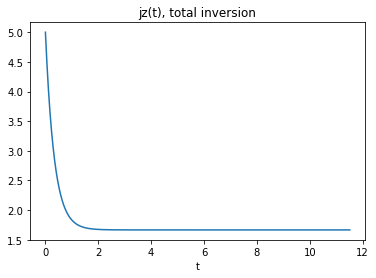

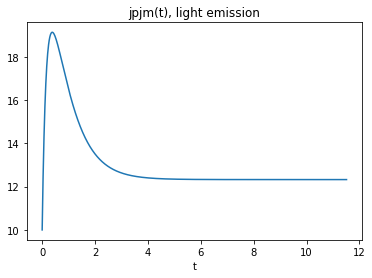

In [35]:
fig1 = plt.figure()
plt.plot(t, jz_t)
#plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t, jpjm_t)
#plt.ylim([-1,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()

In [36]:
#Now use the Dicke fast solver instead of mesolve

In [40]:
rhov = Qobj(rho0.full().flatten(), dims = [[2],[2]])
liouv.full() * rhov.full();
result = dicke.solve(rho0, t)
rho_t = result.states

hamiltonian and rho0 are diagonal: fast solver


In [41]:
jzt_2 = []
jpjmt_2 = []
for k in range (0, len(t)):
    jzt_2.append((jz * rho_t[k]).tr())
    jpjmt_2.append((jp*jm * rho_t[k]).tr())    

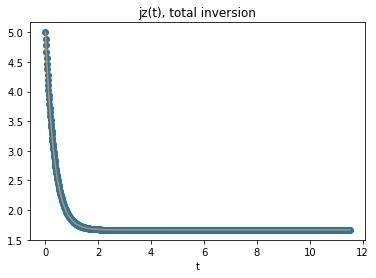

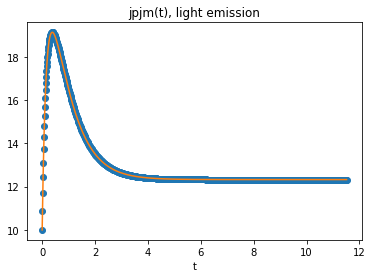

In [42]:
#Compare qutip.mesolve and dicke.solve variables
fig1 = plt.figure()
plt.plot(t, jzt_2, 'o', t, jz_t)
#plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t, jpjmt_2, 'o',t, jpjm_t)
#plt.ylim([-1,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()